In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/matteo-torres/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Average Catch of Salmon Species by Alaska Region from 1878-1997'}, xlabel='Region Code', ylabel='Mean Commercial Catches (in thousands of fish)'>

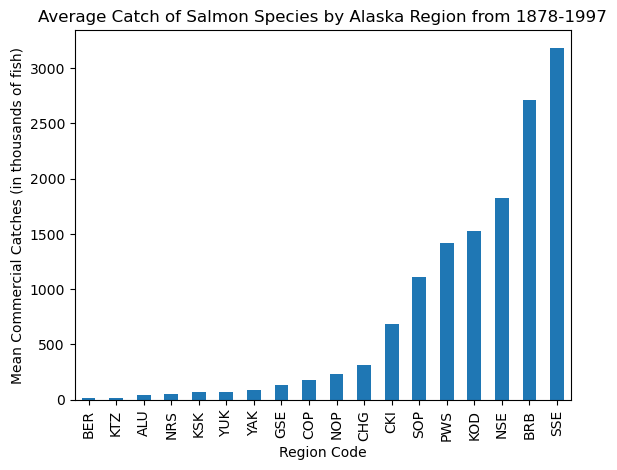

In [2]:
# FINAL CODE

# Import packages
import pandas as pd

# Read salmon data
catch_data = pd.read_csv("data/salmon_data.csv")

# Update "I" value to 1
catch_data.at[400, "Catch"] = 1

# Update data type of "Catch" to numeric
catch_data["Catch"] = pd.to_numeric(catch_data["Catch"])

# Average catch by region
avg_region = catch_data.groupby("Region")["Catch"].mean()

# Bar graph of average Salmon catches by Region
avg_region.sort_values(ascending = True).plot(xlabel = "Region Code",
                                              ylabel = "Mean Commercial Catches (in thousands of fish)",
                                              title = "Average Catch of Salmon Species by Alaska Region from 1878-1997",
                                              kind = "bar")

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# a.

# Import packages
import pandas as pd

# Read salmon data
catch_data = pd.read_csv("data/salmon_data.csv")

# Look at the first five rows
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b.

# Look at the number of rows and columns
print(catch_data.shape)

# Look at column names
print(catch_data.columns)

# Look at the data types for each column
print(catch_data.dtypes)

(8540, 5)
Index(['Region', 'Year', 'notesRegCode', 'Species', 'Catch'], dtype='object')
Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

Initially, I examined the shape of the salmon catch data frame to gain insight into the number of measurements (columns) and observations (rows) it includes. Following that, I explored the column names to understand the specific information gathered for each salmon captured. Finally, I assessed the data types for each column to identify which variables are categorical (object) and which are numerical (int64).types for each column to determine which variables are categorical (object) and which are numerical (int64).

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [5]:
# Assign unique values of `notesRegCode` to `notes_unique`
notes_unique = catch_data["notesRegCode"].unique()

# Print unique values
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [6]:
# Remove `notesRegCode` column from data frame
catch_data = catch_data[["Region", "Year", "Species", "Catch"]]

# Verify `notesRegCode` column is removed
catch_data.head()

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


In [7]:
# Re-check data types
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

No, the "catch" column does not have the expected data type. It is currently an object and it needs to be a an integer.

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [8]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [ ]:
# Filter rows with "I" in the Catch column
catch_I = catch_data[catch_data["Catch"] == "I"]

# Check observation(s)
catch_I

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [ ]:
# Update "I" value to 1
catch_data.at[400, "Catch"] = 1

# Assign the row to `catch_1`
catch_1 = catch_data.loc[400]

# Confirm value was updated
catch_1

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [ ]:
# Update data type of "Catch" to numeric
catch_data["Catch"] = pd.to_numeric(catch_data["Catch"])

# Store data type of "Catch"
catch_column_type = catch_data["Catch"].dtypes

# Confirm
catch_column_type

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [ ]:
# Average catch by region
avg_region = catch_data.groupby("Region")["Catch"].mean()

# Check output
avg_region

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

In [ ]:
# Bar graph of average Salmon catches by Region
avg_region.sort_values(ascending = True).plot(xlabel = "Region Code",
                                              ylabel = "Mean Commercial Catches (in thousands of fish)",
                                              title = "Average Catch of Salmon Species by Alaska Region from 1878-1997",
                                              kind = "bar")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

The Southern Southeast Alaska region is leading with the highest average commercial salmon catches. However, the Bering River Subarea Copper River Subarea is progressing very slowly compared to all the other Alaskan regions.

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).